### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_35 = pd.read_csv('Patient 35_data.csv')

In [3]:
patient_35.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,...,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000
mean,0.031088,0.516631,1.040925,1.564547,1.781527,8.328323,1.063371,1.028379,1.010039,1.008683,...,1.930901,1.923648,2.010401,1.809607,0.857891,1.981903,2.057507,1.978596,1.926288,41.005787
std,0.012161,0.021541,0.019429,0.022230,0.008317,15.876825,0.030005,0.004214,0.003793,0.005598,...,0.023627,0.026933,0.030359,0.052803,0.083851,0.015219,0.002526,0.004700,0.018577,20.088556
min,0.000997,0.435912,0.990527,1.476192,1.688256,1.925574,1.013195,0.977733,0.945533,0.995482,...,1.860913,1.808273,1.909728,1.638707,0.260956,1.939146,2.045906,1.963312,1.892095,18.800000
25%,0.025154,0.509630,1.029245,1.546130,1.777853,6.038795,1.046182,1.025575,1.006773,1.003132,...,1.916223,1.913563,1.999629,1.785636,0.843428,1.972799,2.056219,1.975548,1.913074,25.300000
50%,0.027839,0.518339,1.039974,1.564561,1.781353,6.951350,1.053683,1.027784,1.010526,1.007961,...,1.930313,1.925633,2.010643,1.826044,0.864450,1.979522,2.057590,1.978628,1.920658,34.800000
75%,0.032266,0.530610,1.049515,1.581528,1.784431,7.443108,1.068224,1.030410,1.012798,1.014164,...,1.942972,1.937795,2.024366,1.848289,0.886808,1.992139,2.058821,1.981422,1.936346,47.900000
max,0.079016,0.553370,1.103639,1.618322,1.824558,290.635165,1.225962,1.042300,1.022970,1.033683,...,2.019053,1.994614,2.075607,1.892481,1.079388,2.019595,2.065547,1.996466,1.988321,97.700000


In [4]:
X=patient_35.drop('BIS', axis=1)
y= patient_35['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

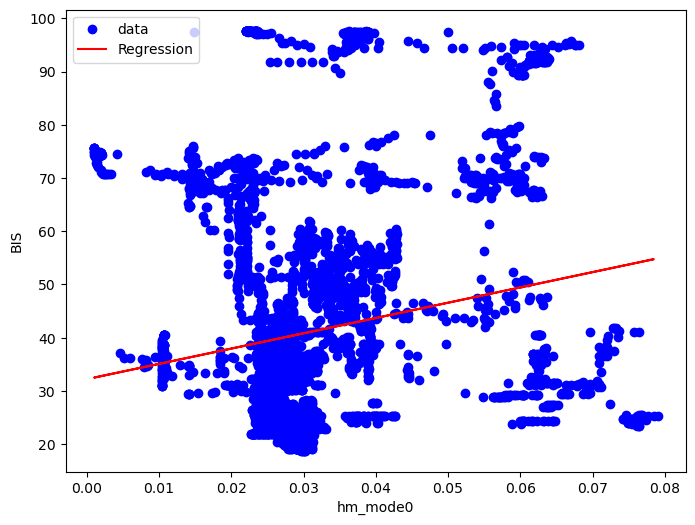

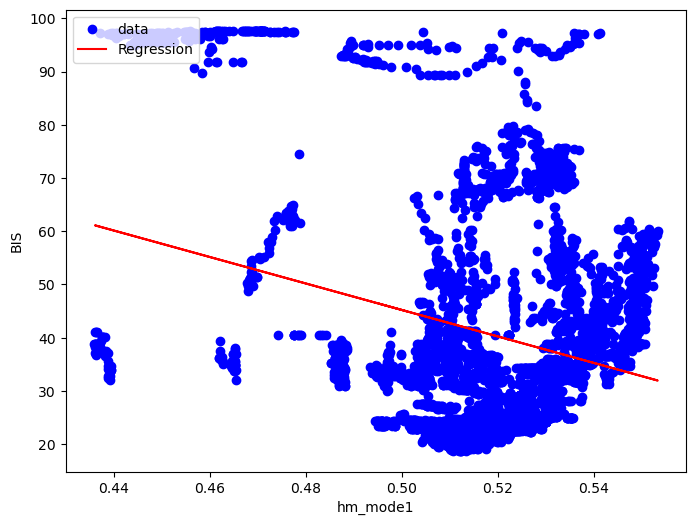

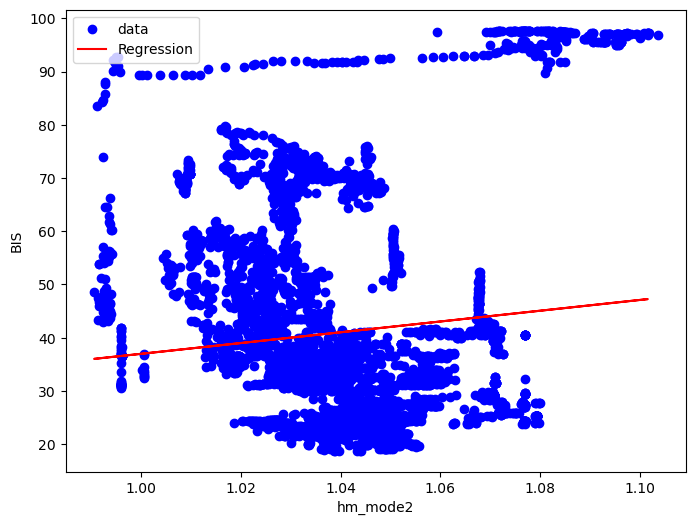

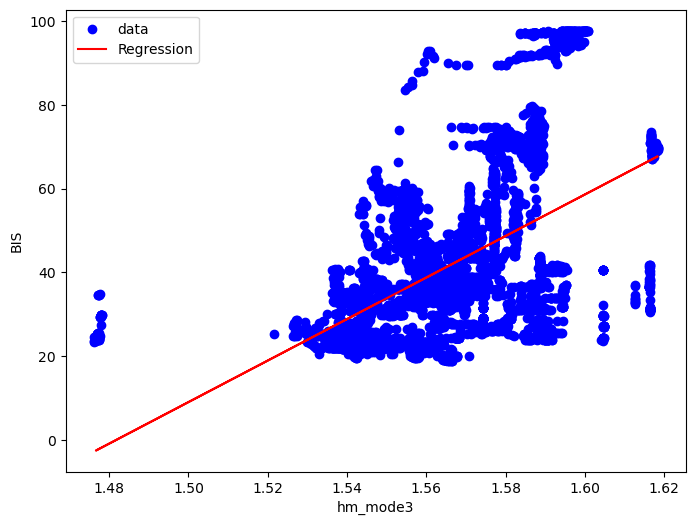

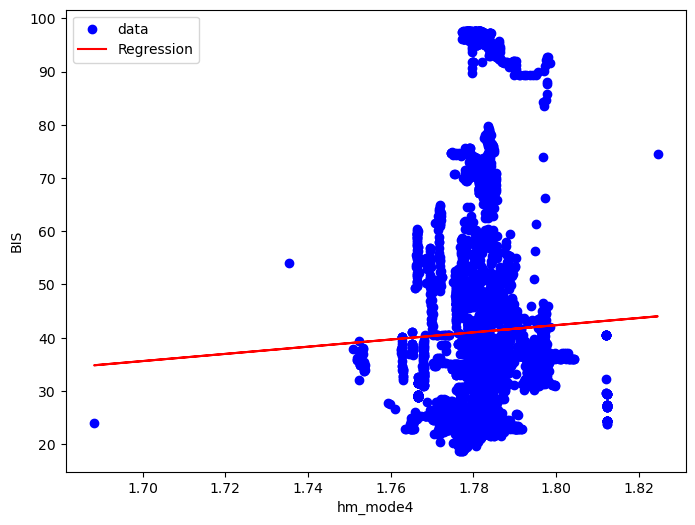

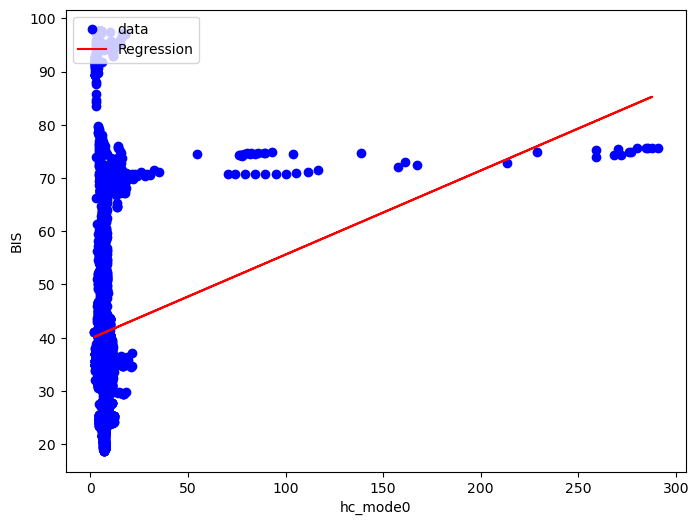

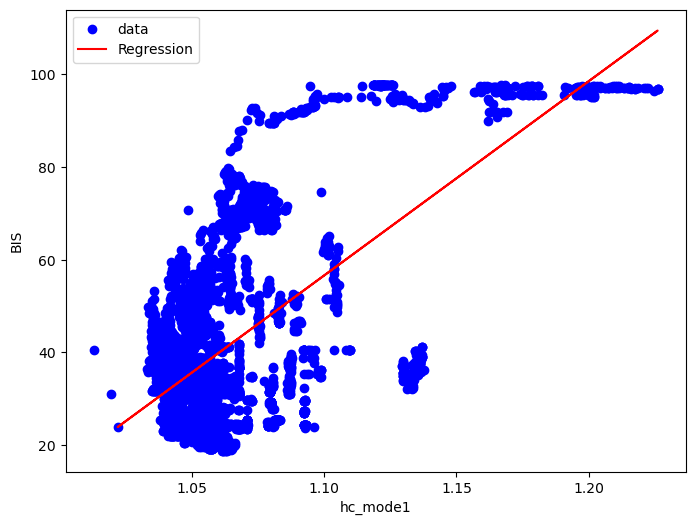

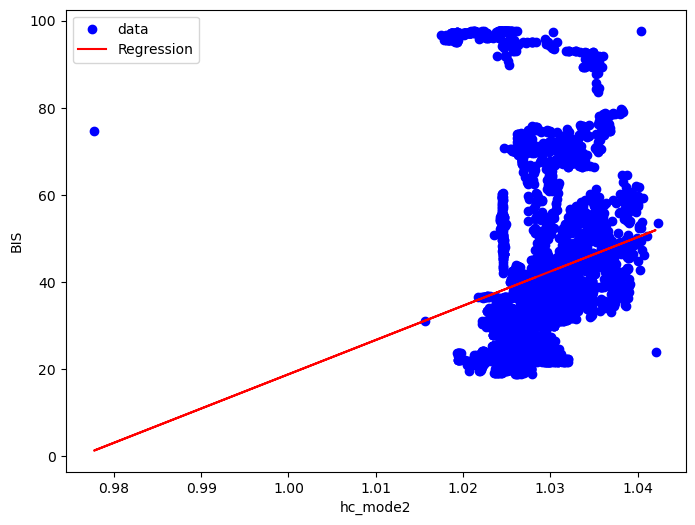

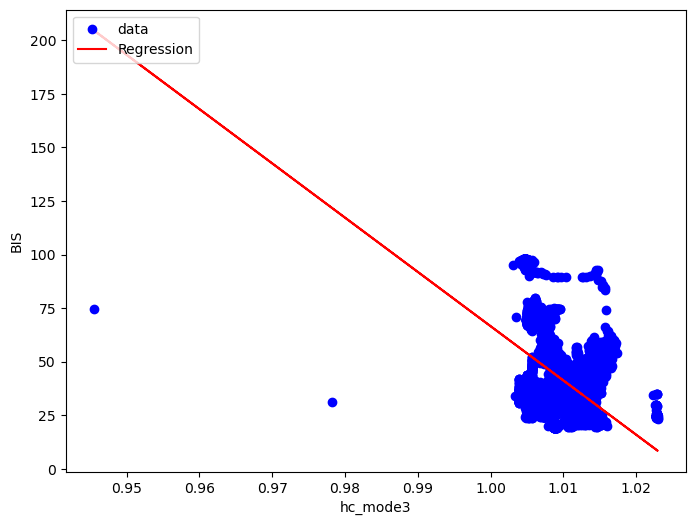

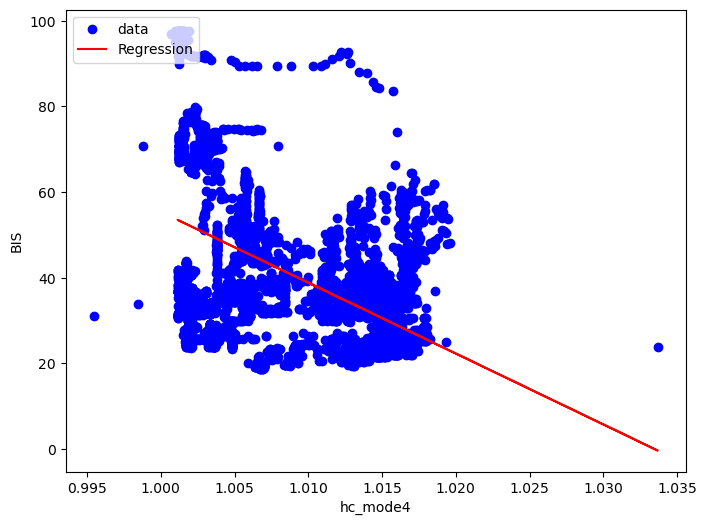

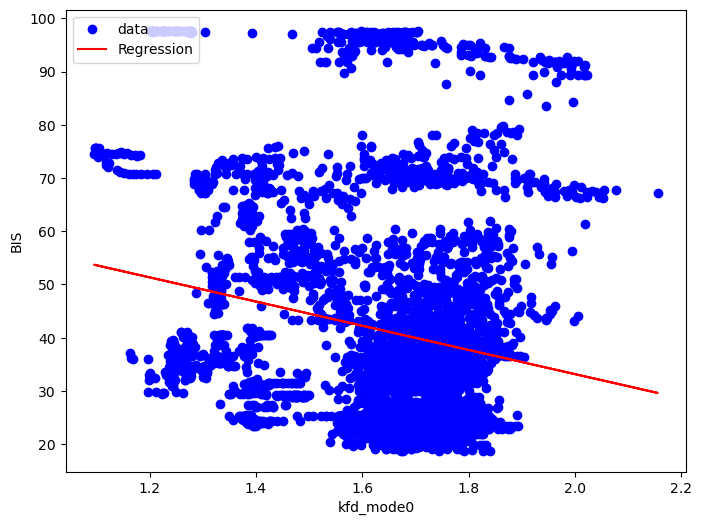

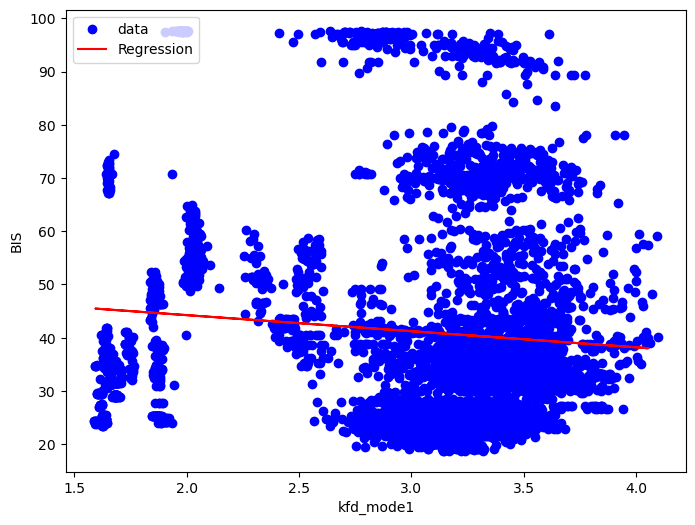

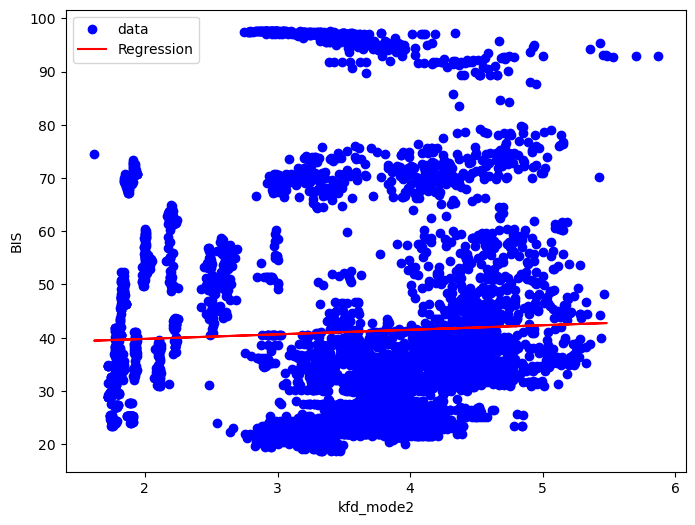

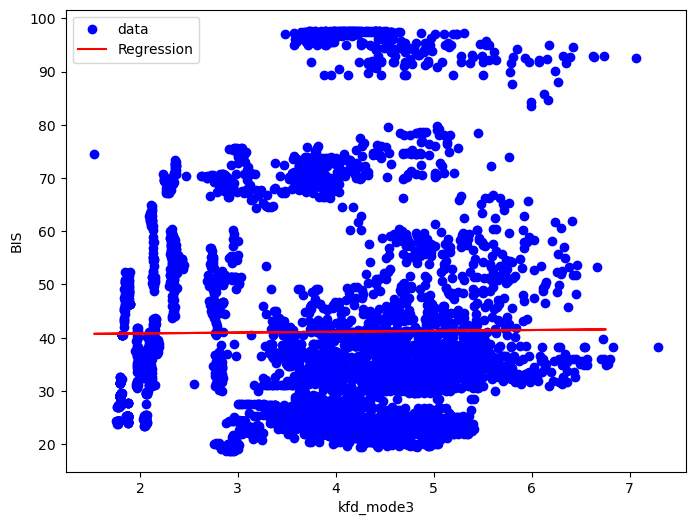

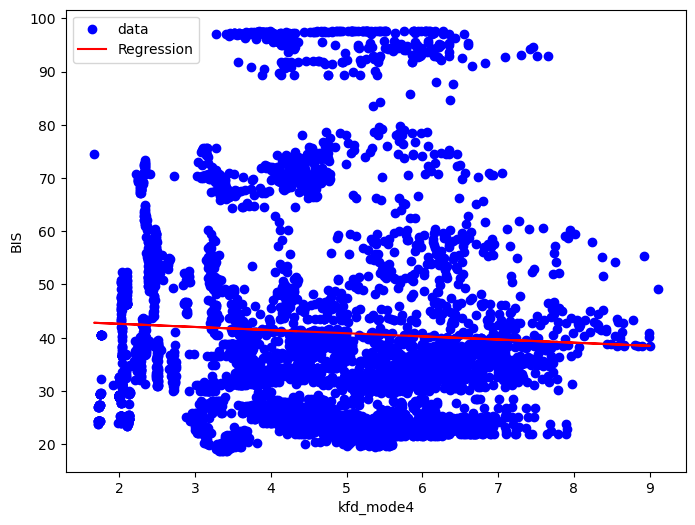

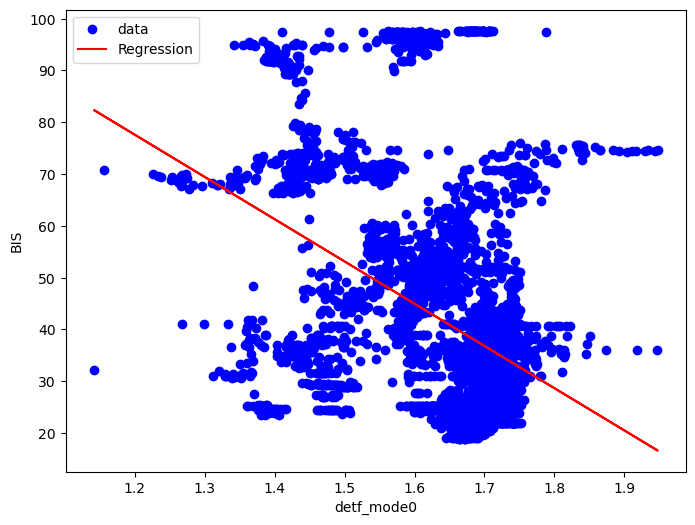

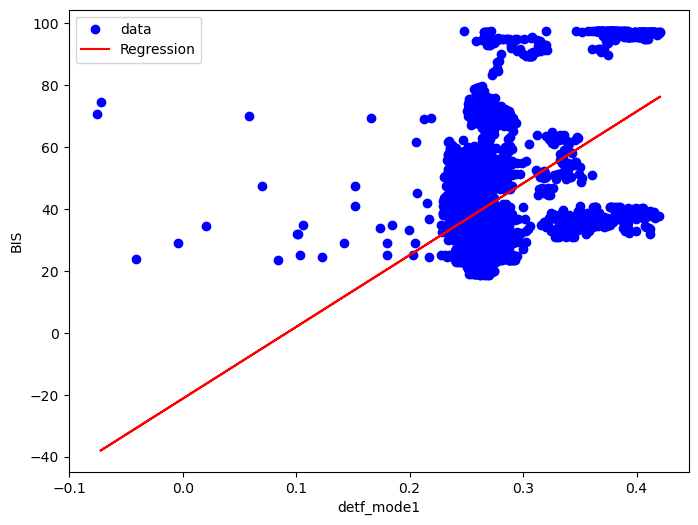

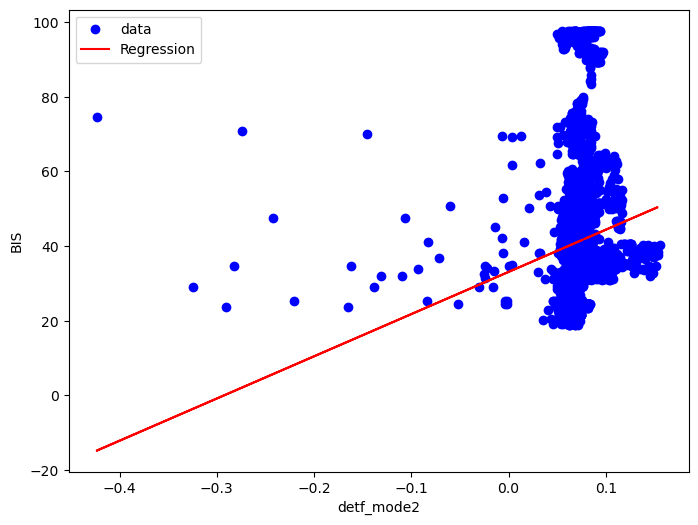

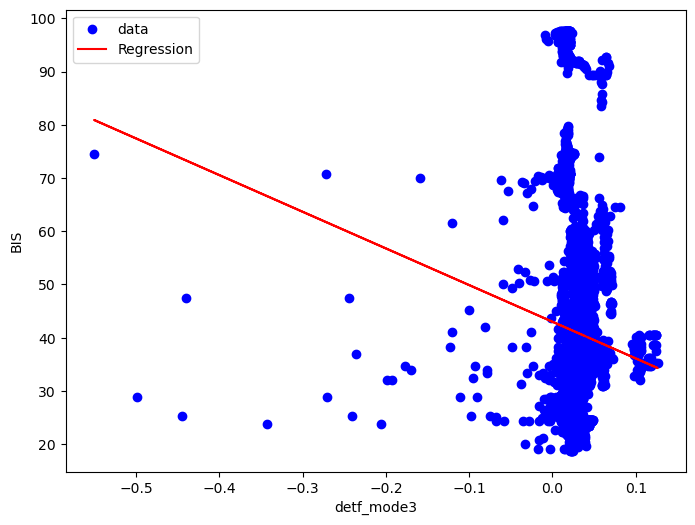

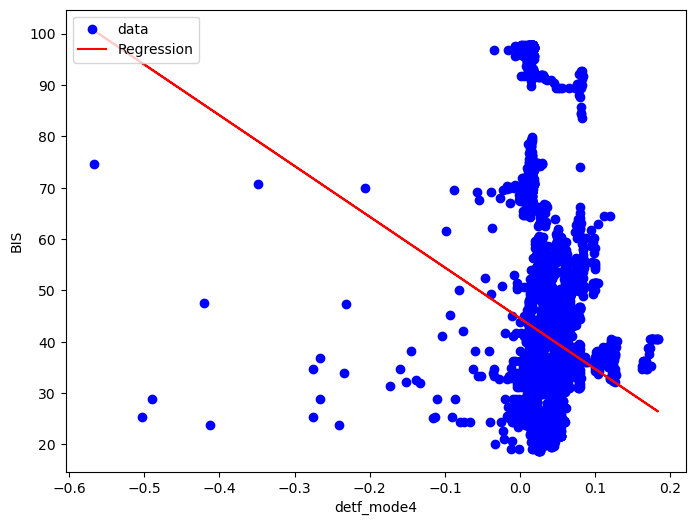

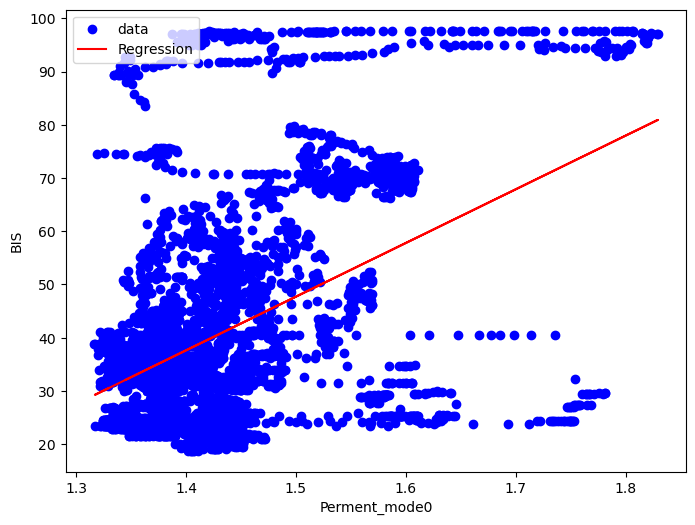

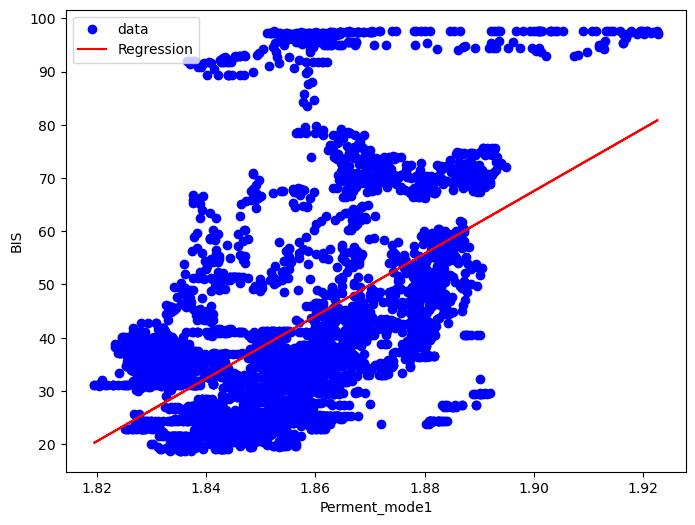

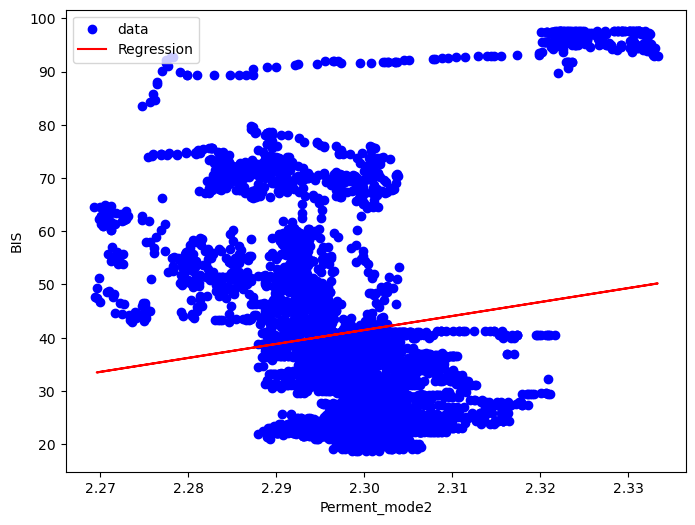

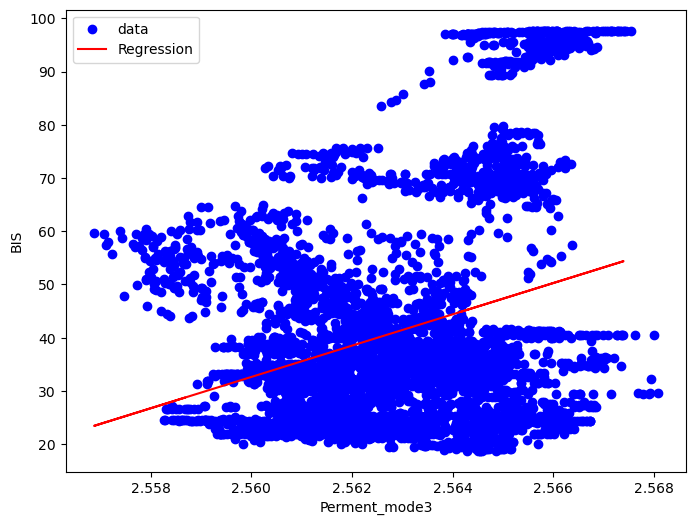

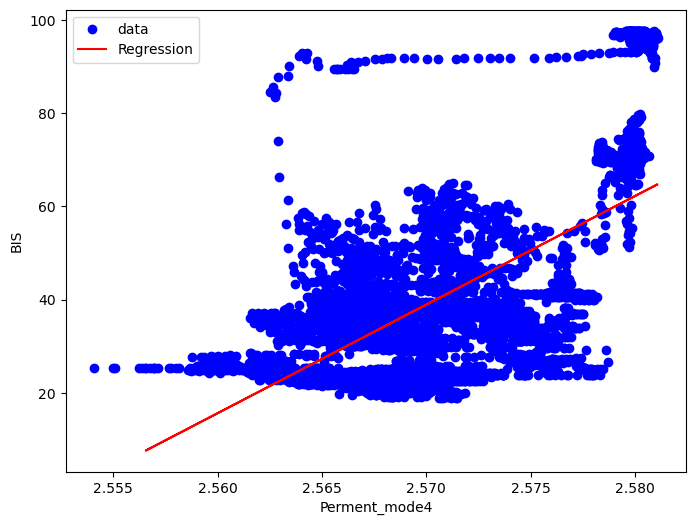

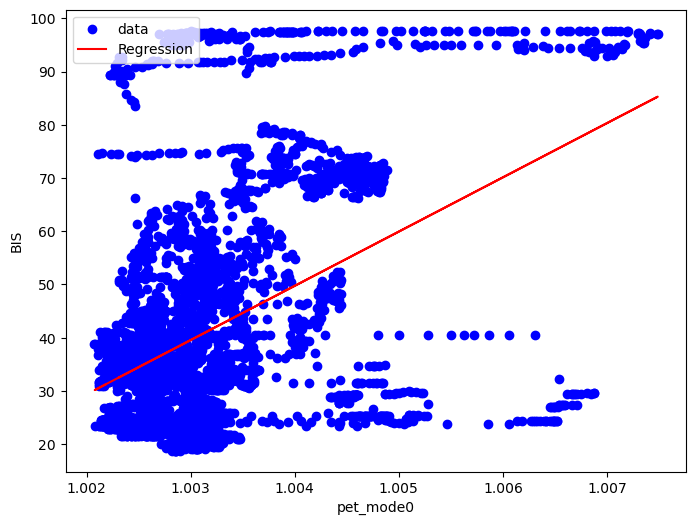

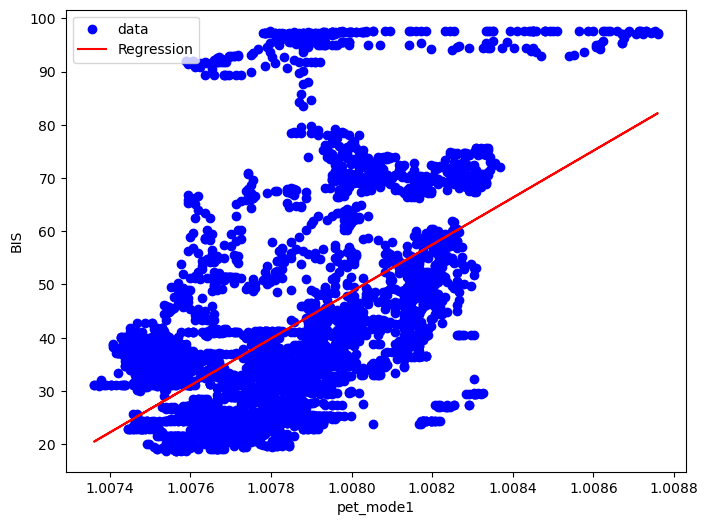

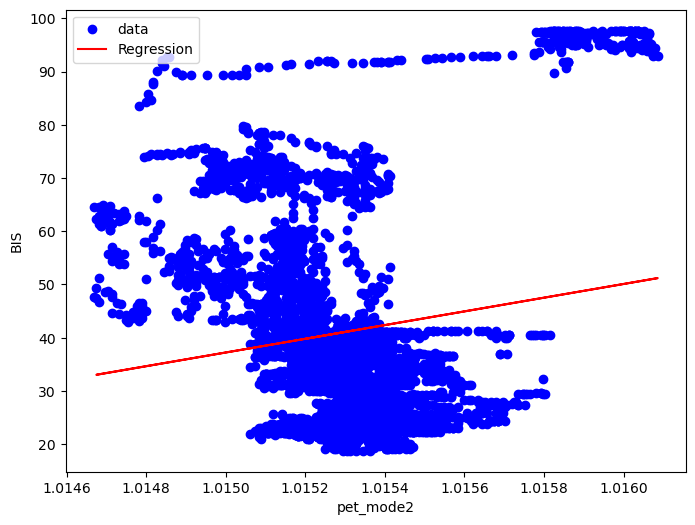

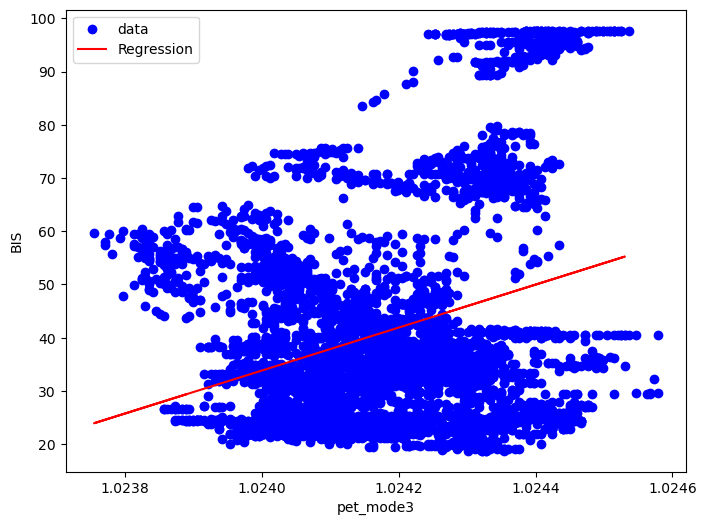

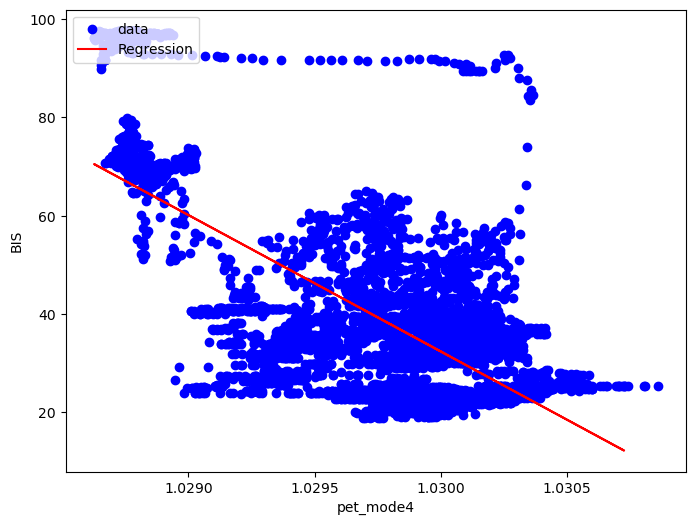

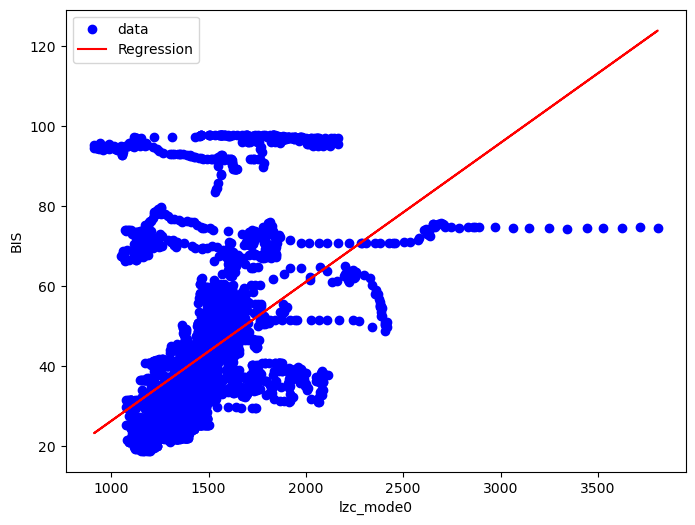

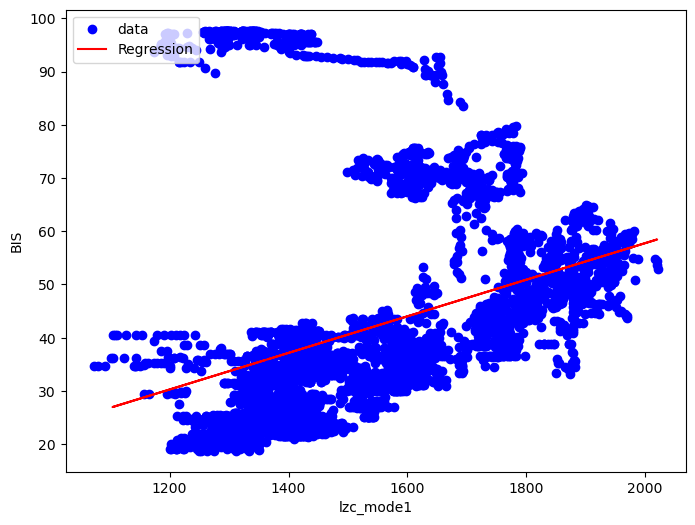

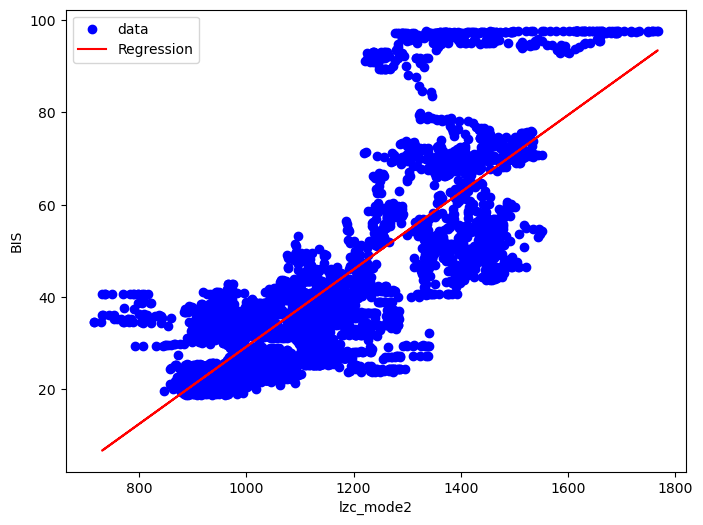

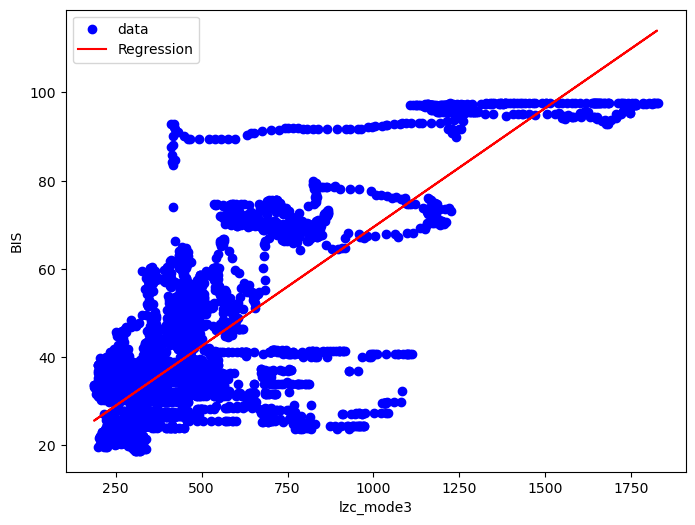

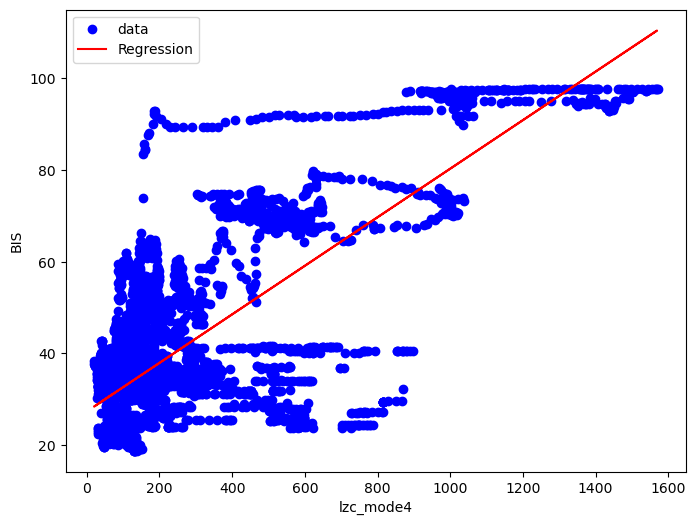

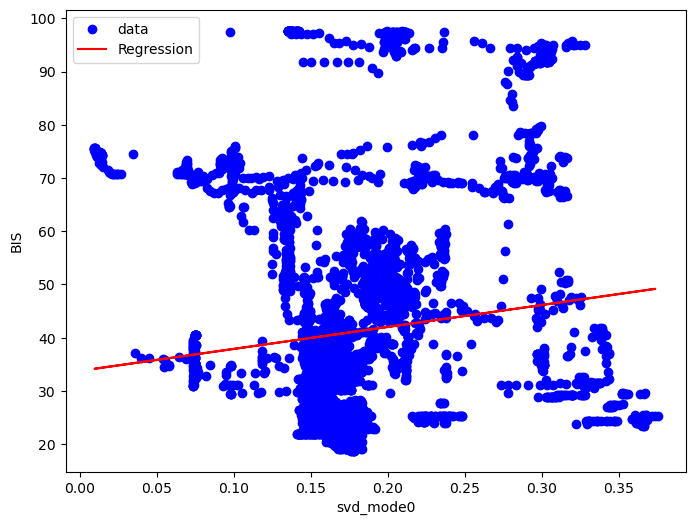

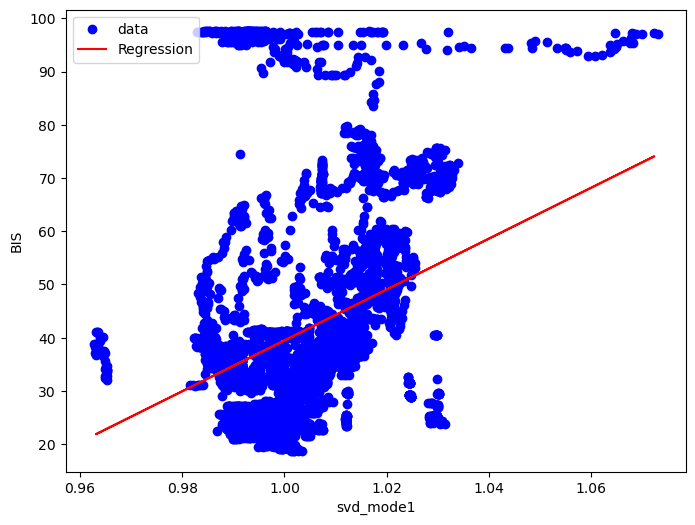

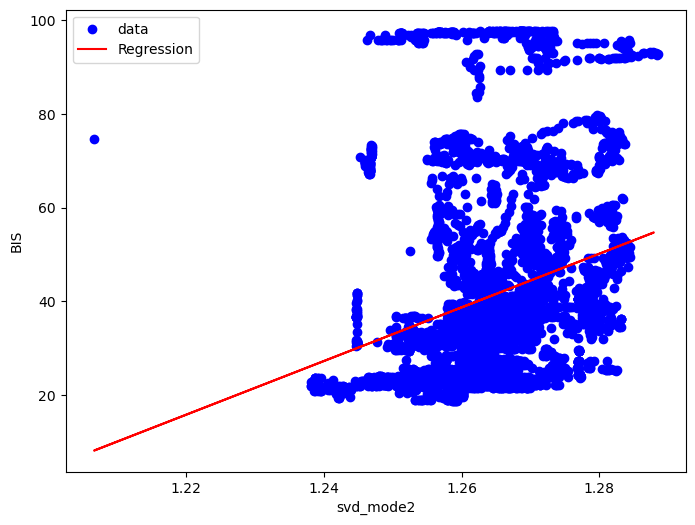

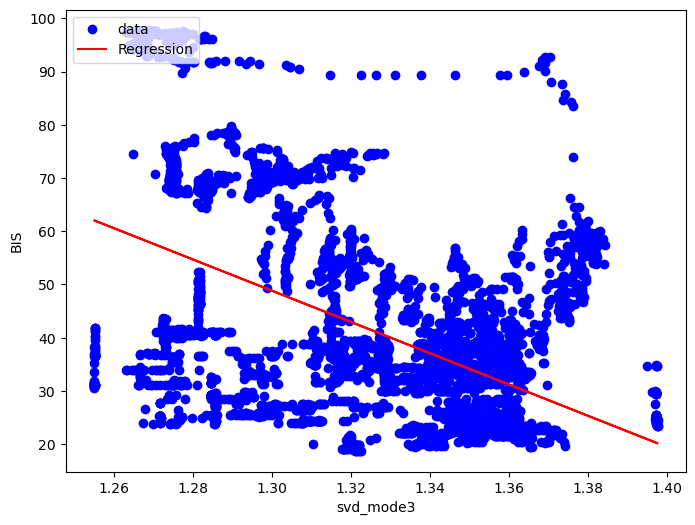

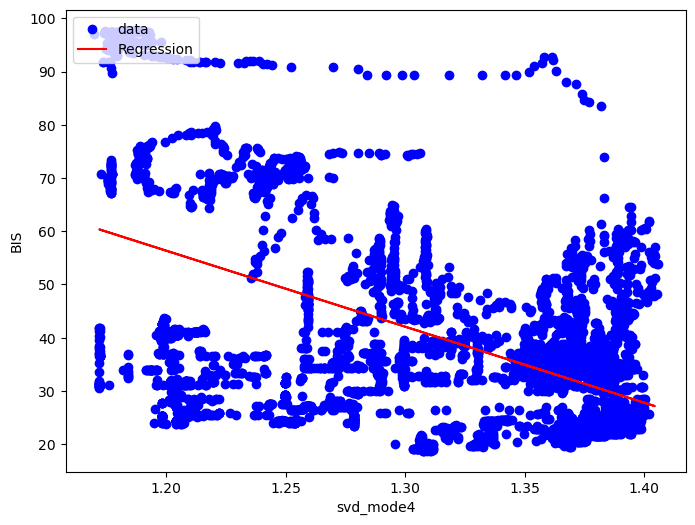

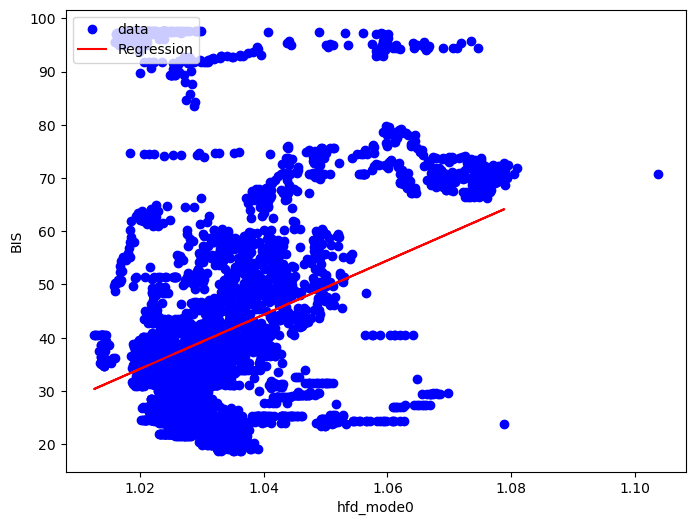

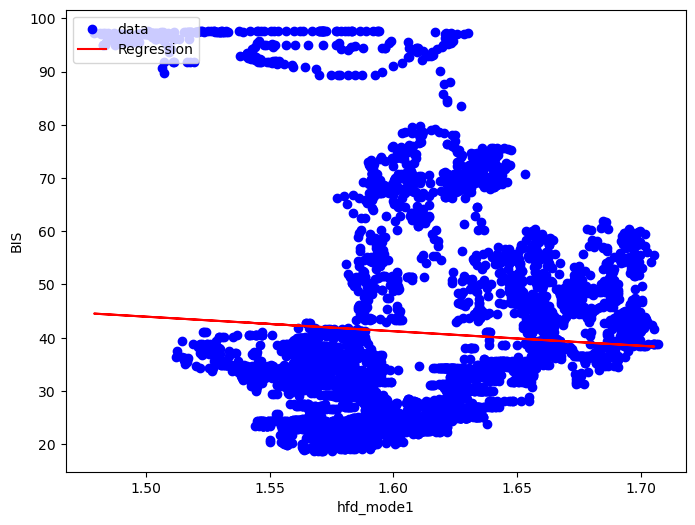

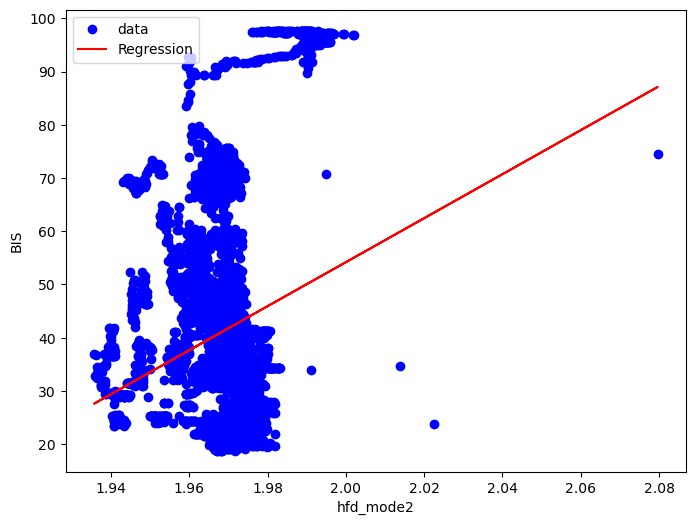

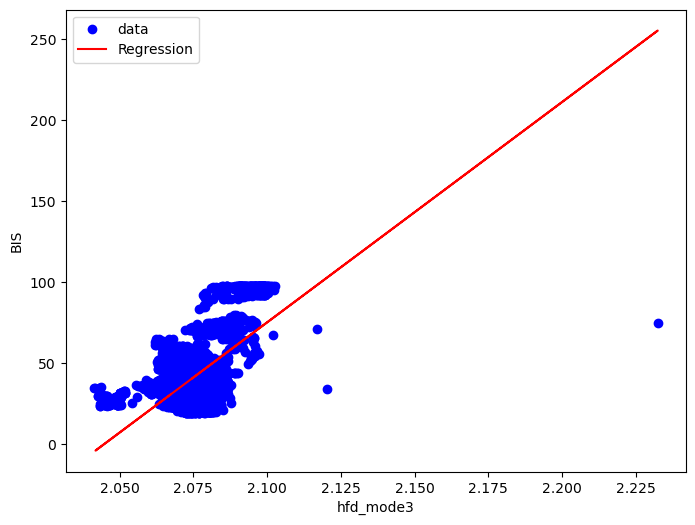

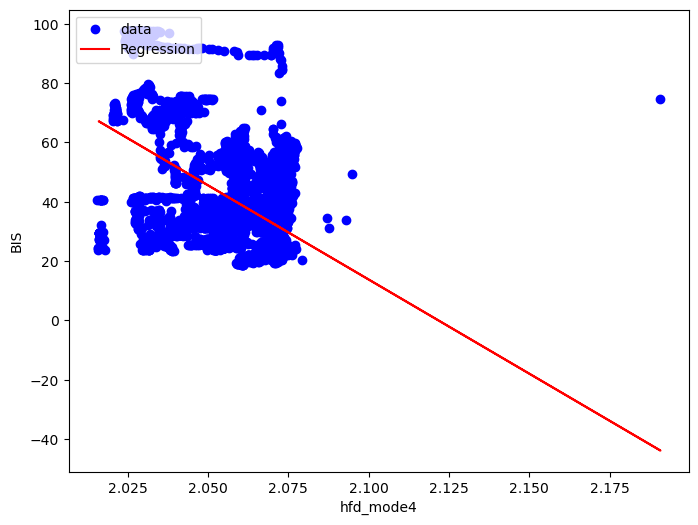

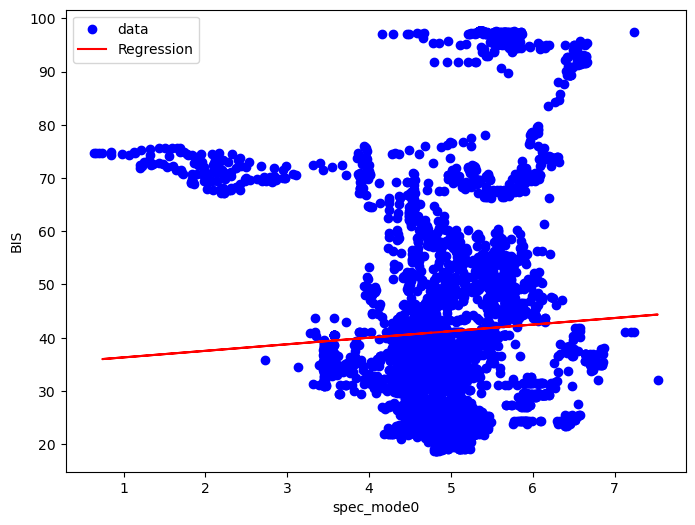

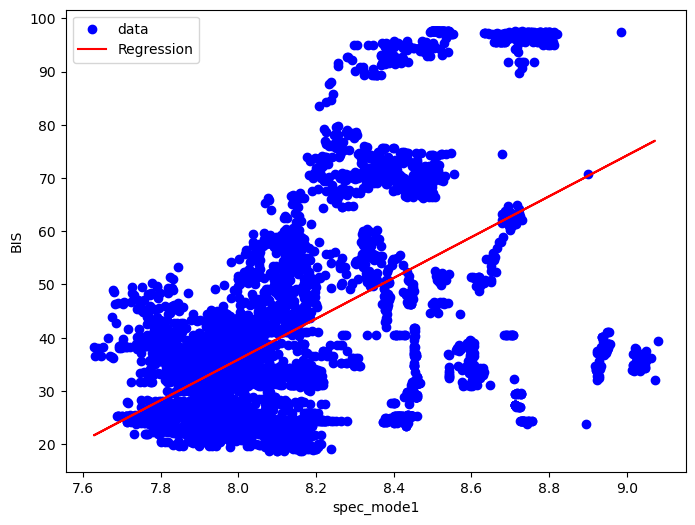

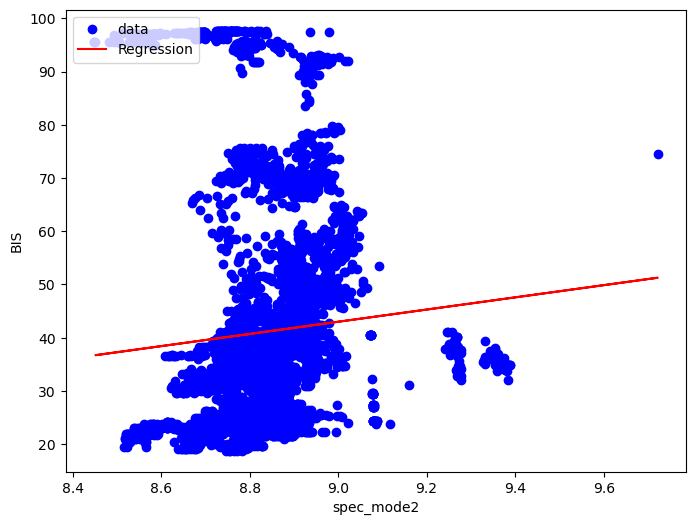

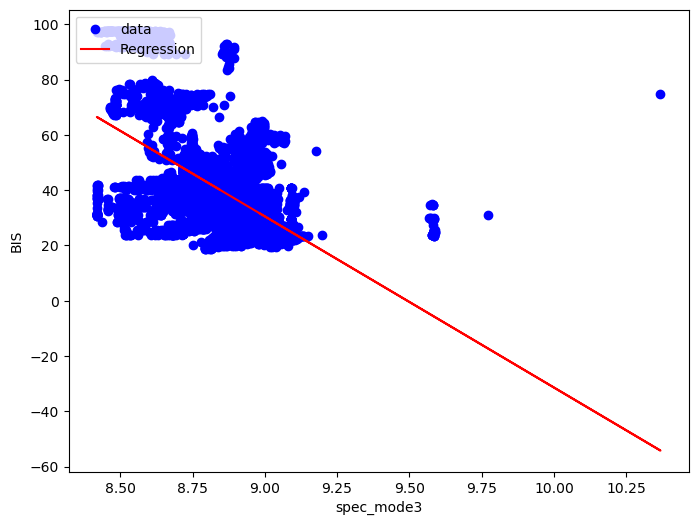

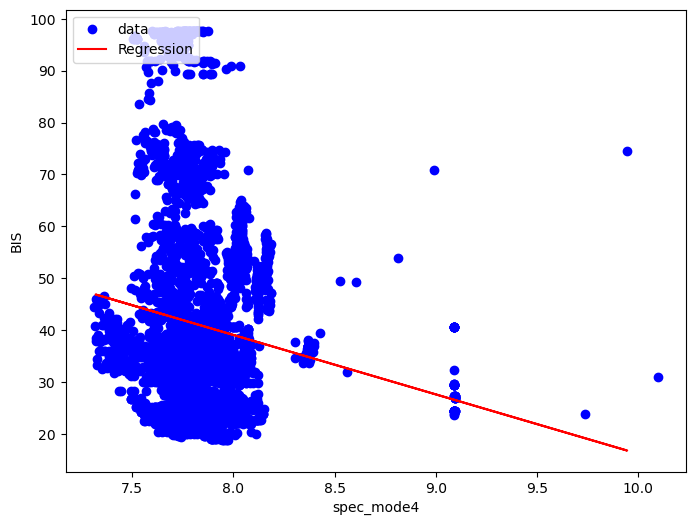

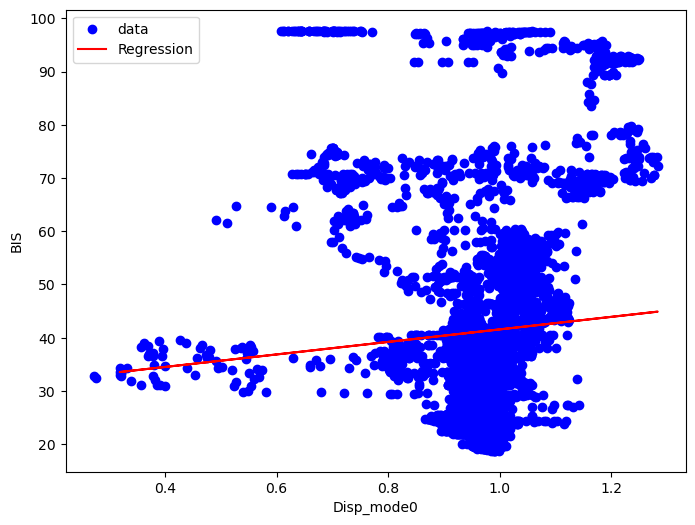

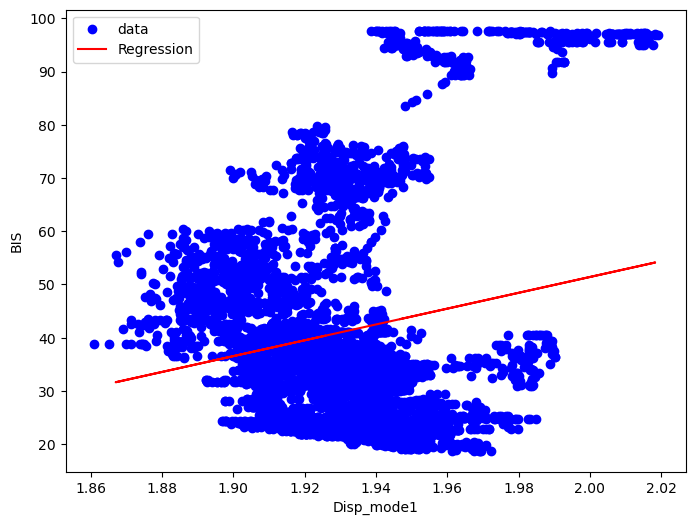

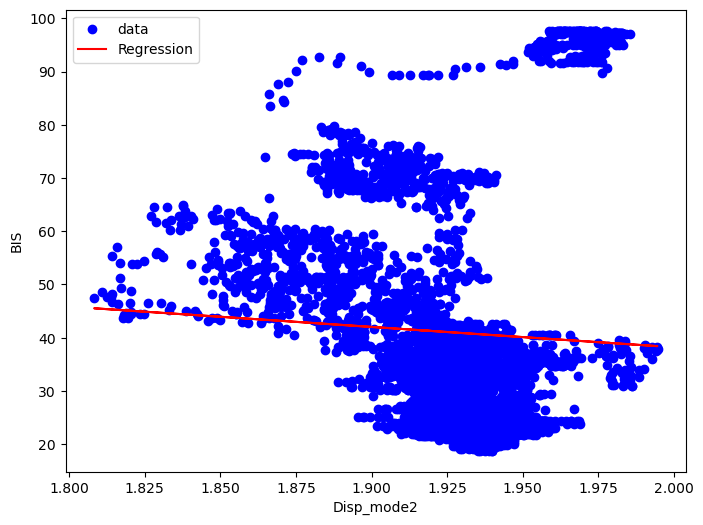

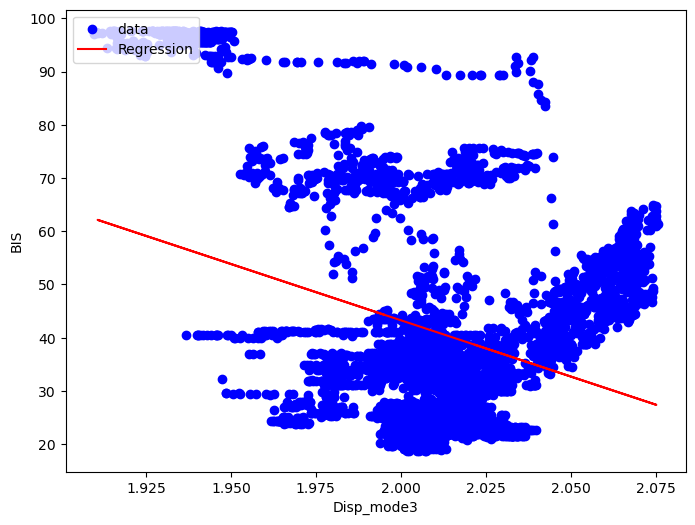

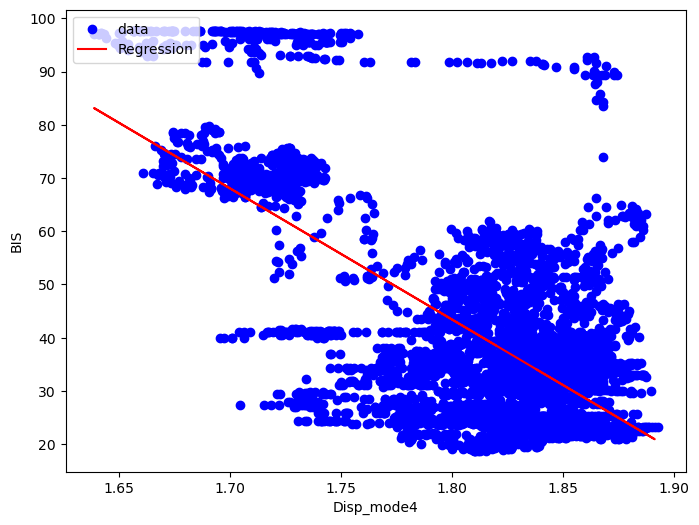

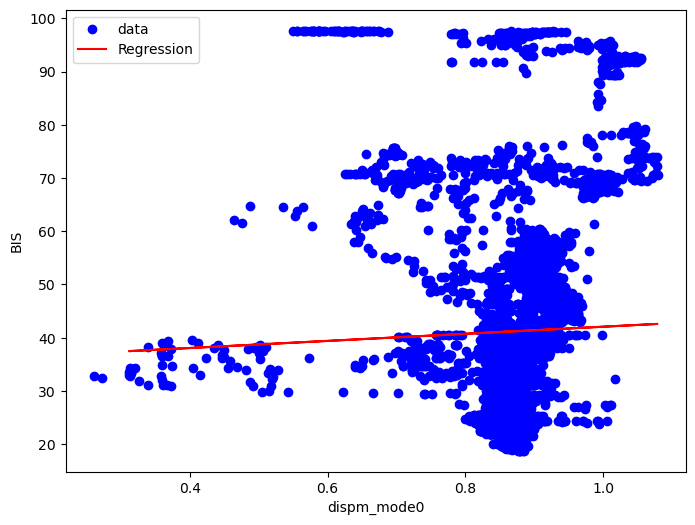

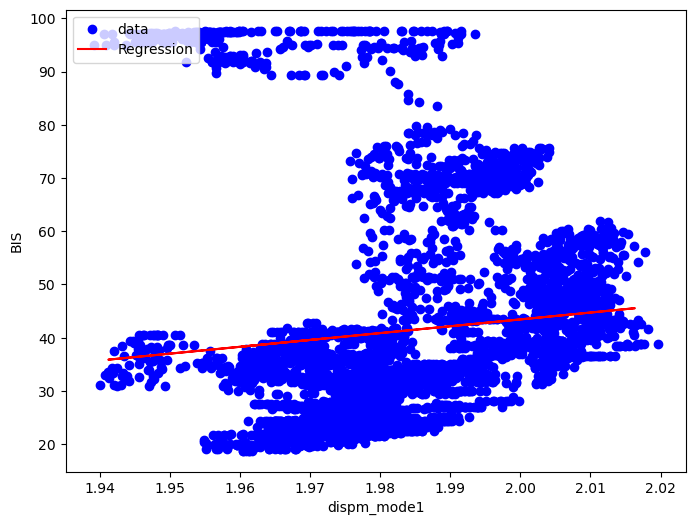

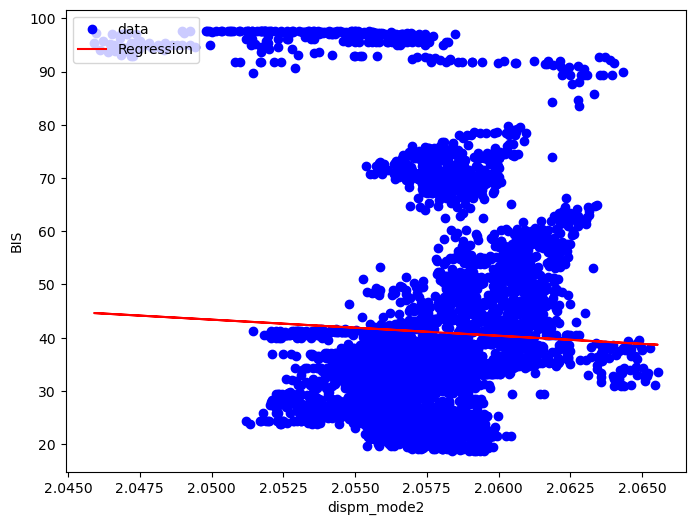

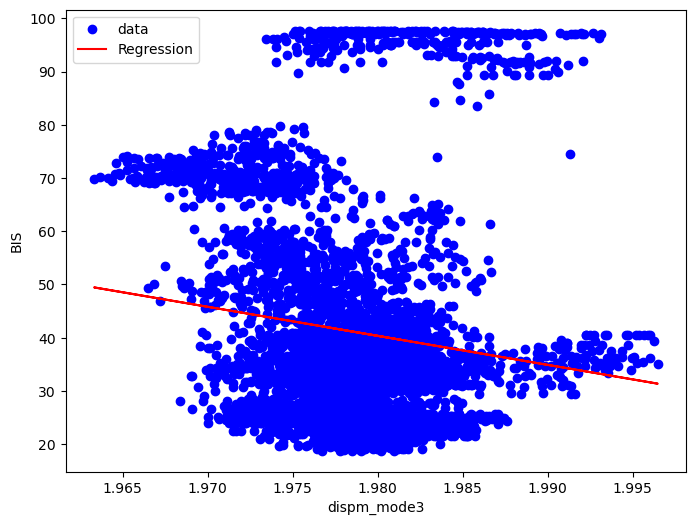

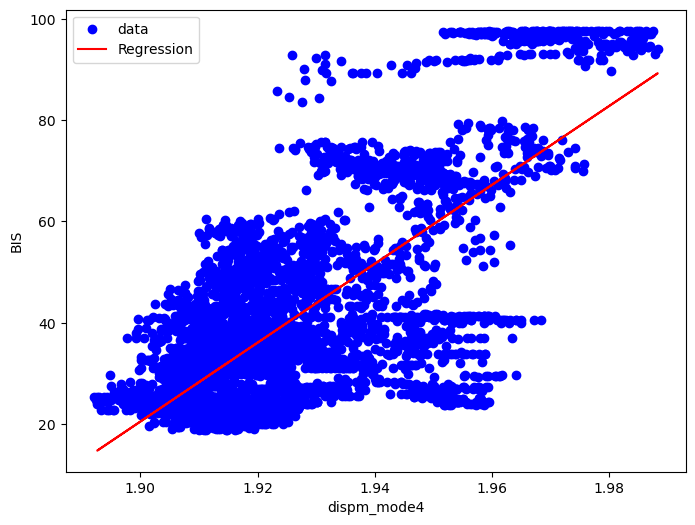

In [6]:

for column in patient_35.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_35, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
33,lzc_mode3_r2,62.795705
32,lzc_mode2_r2,61.558041
34,lzc_mode4_r2,58.174280
59,dispm_mode4_r2,51.368344
29,pet_mode4_r2,44.341940
54,Disp_mode4_r2,43.482305
6,hc_mode1_r2,41.222007
24,Perment_mode4_r2,37.833232
43,hfd_mode3_r2,31.211811
46,spec_mode1_r2,29.821590


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
24  Perment_mode4    0.602391
31      lzc_mode1    0.108254
32      lzc_mode2    0.083603
53     Disp_mode3    0.054050
51     Disp_mode1    0.021759
50     Disp_mode0    0.015069
55    dispm_mode0    0.014343
52     Disp_mode2    0.007745
43      hfd_mode3    0.007301
7        hc_mode2    0.006978
3        hm_mode3    0.006047
5        hc_mode0    0.005858
36      svd_mode1    0.004454
37      svd_mode2    0.004227
30      lzc_mode0    0.003928
6        hc_mode1    0.003696
48     spec_mode3    0.003589
21  Perment_mode1    0.003443
1        hm_mode1    0.002902
33      lzc_mode3    0.002796
23  Perment_mode3    0.002683
19     detf_mode4    0.002682
41      hfd_mode1    0.002672
26      pet_mode1    0.001911
22  Perment_mode2    0.001781
4        hm_mode4    0.001270
57    dispm_mode2    0.001260
47     spec_mode2    0.001214
15     detf_mode0    0.001085
34      lzc_mode4    0.001051
46     spec_mode1    0.001025
20  Perment_mode0    0.000977
45     spe